# INTRODUCTION

### Data Preparation

In [35]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [36]:
txtdata="aluminium - dangerous if greater than 2.8 ammonia - dangerous if greater than 32.5 arsenic - dangerous if greater than 0.01 barium - dangerous if greater than 2 cadmium - dangerous if greater than 0.005chloramine - dangerous if greater than 4 chromium - dangerous if greater than 0.1 copper - dangerous if greater than 1.3 flouride - dangerous if greater than 1.5 bacteria - dangerous if greater than 0 viruses - dangerous if greater than 0 lead - dangerous if greater than 0.015 nitrates - dangerous if greater than 10 nitrites - dangerous if greater than 1 mercury - dangerous if greater than 0.002 perchlorate - dangerous if greater than 56 radium - dangerous if greater than 5 selenium - dangerous if greater than 0.5 silver - dangerous if greater than 0.1 uranium - dangerous if greater than 0.3 is_safe - class attribute {0 - not safe, 1 - safe} "

In [37]:
#print(txtdata)
#res = [float(i) for i in txtdata.split() if isinstance(i, float)]
import re
result = re.findall(r"[-+]?\d*\.\d+|\d+", txtdata)
print (result)

#print(str(res))

['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [38]:
Data=pd.read_csv('waterQuality1.csv')
Data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [39]:
AmmoniaData=[]
for i in range(len(Data)):
    k=Data.loc[i,'ammonia']
    if k=='#NUM!':
        AmmoniaData+=[0]
    else:
        AmmoniaData+=[float(k)]
Data['ammonia']=AmmoniaData

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [40]:
OriginalDataForLDA=Data.copy()
OriginalData=Data.copy()

In [41]:
indexNames = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == "#NUM!" ].index
#Delete these row indexes from dataFrame
OriginalDataForLDA.drop(indexNames , inplace=True)

In [42]:
# separate safe and not safe data
data_0 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '0']
data_1 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '1']

In [43]:
data_0 = data_0.sample(n=7084)

In [44]:
#put the issafe column together again
data_isSafe = data_1.append(data_0)
data_isSafe.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [45]:
u = data_isSafe.iloc[:, :-1]
v = data_isSafe.iloc[:, -1]

### Resampling

In [46]:
# import library
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
u_rus, v_rus = rus.fit_resample(u, v)

print('original dataset shape:', Counter(v))
print('Resample dataset shape', Counter(v_rus))

original dataset shape: Counter({'0': 7084, '1': 912})
Resample dataset shape Counter({'0': 912, '1': 912})


In [47]:
resampled=v_rus
resampled_variable=u_rus

In [48]:
resampled = resampled.to_frame(name="is_safe")

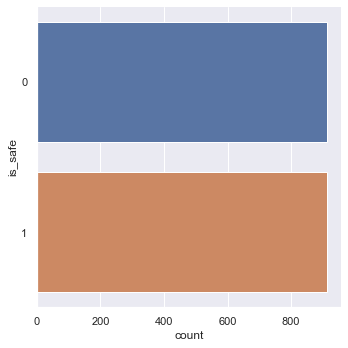

In [49]:
sb.catplot(y = 'is_safe', data = resampled, kind = "count")

The number of safe data and not safe data are now equal

In [50]:
# combine the data together again
OriginalDataForLDA=resampled_variable
OriginalDataForLDA["is_safe"]=resampled
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.02,1.82,0.07,1.96,0.07,0.12,0.00,0.38,0.02,0.76,...,0.121,7.89,1.61,0.008,6.60,0.24,0.07,0.06,0.09,0
1,2.29,21.66,0.58,1.61,0.08,5.31,0.13,1.68,0.76,0.00,...,0.163,5.69,1.76,0.002,11.79,4.05,0.03,0.12,0.08,0
2,0.08,13.90,0.86,1.04,0.11,2.39,0.29,0.99,0.31,0.01,...,0.190,11.30,1.44,0.003,35.07,3.41,0.04,0.09,0.04,0
3,0.20,3.72,0.14,1.46,0.06,0.97,0.10,1.60,0.83,0.68,...,0.153,5.65,1.81,0.009,25.80,7.22,0.05,0.49,0.05,0
4,0.01,28.30,0.07,1.52,0.10,0.10,0.02,0.04,0.59,0.00,...,0.025,0.86,0.21,0.001,8.13,6.36,0.03,0.00,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
1820,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
1821,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
1822,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [51]:
DescribeFrame=Data.describe()

In [52]:
ColList=list(Data.columns)
print(ColList)
MaxCount=DescribeFrame.iloc[7]
Max_list =MaxCount.tolist()
print(Max_list)
print (result)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']
[5.05, 29.84, 1.05, 4.94, 0.13, 8.68, 0.9, 2.0, 1.5, 1.0, 1.0, 0.2, 19.83, 2.93, 0.01, 60.01, 7.99, 0.1, 0.5, 0.09]
['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [53]:
for j in range (19):
    if float(Max_list[j])<=float(result[j]):
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), 100.00],
                           labels=['Safe', 'Dangerous'])
    else:
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), float(Max_list[j])],
                           labels=['Safe', 'Dangerous'])

In [54]:
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,bacteria_bin,viruses_bin,lead_bin,nitrates_bin,nitrites_bin,mercury_bin,perchlorate_bin,radium_bin,selenium_bin,silver_bin
0,0.02,1.82,0.07,1.96,0.07,0.12,0.00,0.38,0.02,0.76,...,Dangerous,Safe,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
1,2.29,21.66,0.58,1.61,0.08,5.31,0.13,1.68,0.76,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
2,0.08,13.90,0.86,1.04,0.11,2.39,0.29,0.99,0.31,0.01,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
3,0.20,3.72,0.14,1.46,0.06,0.97,0.10,1.60,0.83,0.68,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
4,0.01,28.30,0.07,1.52,0.10,0.10,0.02,0.04,0.59,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Dangerous
1820,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1821,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1822,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Safe,Safe,Safe,Dangerous


Through Random Forrest, we use the top 3 feature importance, which is `aluminium`, `cadmium` and `perchlorate`. We will now apply this to LDA and Random Forrest to compare accuracy.

### Random Forest

In [55]:
# Extract Response and Predictors
y = pd.DataFrame(OriginalDataForLDA["is_safe"])
X = pd.DataFrame(OriginalDataForLDA[["aluminium","cadmium","perchlorate"]])

In [56]:
# necessary imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [58]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
y_pred_train= clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.7828947368421053


In [59]:
print(confusion_matrix(y_train, y_train_pred))

[[379 310]
 [395 284]]


### LDA

In [60]:
import plotly.express as px # for data visualization

# Skleran
from sklearn.preprocessing import StandardScaler # for data standardization
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.tree import DecisionTreeClassifier # for decision tree models

# Sklearn dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # for LDA analysis
from sklearn.decomposition import PCA # for PCA analysis"

In [61]:
fig = px.scatter_3d(OriginalDataForLDA, 
                    x=OriginalDataForLDA['aluminium'], y=OriginalDataForLDA['cadmium'], z=OriginalDataForLDA['perchlorate'],
                    color=OriginalDataForLDA['is_safe'],
                    color_discrete_sequence=['#636EFA','#EF553B','#00CC96'], 
                    hover_data=['chloramine','aluminium', 'cadmium','is_safe'],
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [62]:
# Select features
X=OriginalDataForLDA[['aluminium', 'cadmium', 'perchlorate']]
# Select target
y=OriginalDataForLDA['is_safe'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Get scaler
scaler=StandardScaler()
# Perform standard scaling on model features
X_std_train=scaler.fit_transform(X_train)

In [63]:
# Select the model and its parameters
pca = PCA(n_components=2) # reducing from 3 dimensions to 2

# Fit the model
X_trans_pca_train=pca.fit_transform(X_std_train)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  3
No. of samples:  1368
No. of components:  2
Explained variance ratio:  [0.48638142 0.27859203]


In [64]:
# Create a scatter plot
fig = px.scatter(OriginalDataForLDA, x=X_trans_pca_train[:,0], y=X_trans_pca_train[:,1], 
                 labels={
                     "x": "PC1",
                     "y": "PC2",
                     "color" : "is_safe"
                 },
                 opacity=1, color=y_train)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="PCA scatter plot")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [65]:
pca = PCA(n_components=2)                       

# Fit the model
X_trans_pca_train=pca.fit_transform(X_std_train)

# Print the results
print('*************** PCA Summary ***************')
print('No. of features: ', pca.n_features_)
print('No. of samples: ', pca.n_samples_)
print('No. of components: ', pca.n_components_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)

*************** PCA Summary ***************
No. of features:  3
No. of samples:  1368
No. of components:  2
Explained variance ratio:  [0.48638142 0.27859203]


In [66]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_trans_pca_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_trans_pca_train)


print("Goodness of Fit of Model for PCA with ALL variables \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_trans_pca_train, y_train))
print()
print("RECALL==TRUE POSITIVE RATE")

print(classification_report(y_train, y_train_pred))

Goodness of Fit of Model for PCA with ALL variables 	Train Dataset
Classification Accuracy 	: 0.7989766081871345

RECALL==TRUE POSITIVE RATE
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       683
           1       0.90      0.67      0.77       685

    accuracy                           0.80      1368
   macro avg       0.82      0.80      0.80      1368
weighted avg       0.82      0.80      0.80      1368

